<h1> Welcome to my Titanic Kernel! </h1>
<h2>This kernel will provide a analysis through the Titanic Disaster to understand the Survivors patterns</h2><br>

I will handle with data (<i>transform, missings, manipulation</i>), explore the data (<i>descritive and visual</i>) and also create a Deep Learning model

Are you looking for another interesting Kernels? <a href="https://www.kaggle.com/kabure/kernels">CLICK HERE</a> <br>
Give me your feedback and if yo like this kernel, votes up

<i>*I'm from Brazil, so english is not my first language, sorry about some mistakes</i>

# Table of Contents:

**1. [Introduction](#Introduction)** <br>
**2. [Librarys](#Librarys)** <br>
**3. [Knowning the data](#Known)** <br>
**4. [Exploring some Variables](#Explorations)** <br>
**5. [Preprocessing](#Prepocess)** <br>
**6. [Modelling](#Model)** <br>
**7. [Validation](#Validation)** <br>


<a id="Introduction"></a> <br> 
# **1. Introduction:** 
<h3> The data have 891 entries on train dataset and 418 on test dataset</h3>
- 10 columns in train_csv and 9 columns in train_test


<h2>Competition Description: </h2>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

<h3>Data Dictionary</h3><br>
Variable	Definition	Key<br>
<b>survival</b>	Survival	0 = No, 1 = Yes<br>
<b>pclass</b>	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd<br>
<b>sex</b>	Sex	<br>
<b>Age</b>	Age in years	<br>
<b>sibsp</b>	# of siblings / spouses aboard the Titanic	<br>
<b>parch</b>	# of parents / children aboard the Titanic	<br>
<b>ticket</b>	Ticket number	<br>
<b>fare</b>	Passenger fare	<br>
<b>cabin</b>	Cabin number	<br>
<b>embarked	</b>Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<br>
<h3>Variable Notes</h3><br>
<b>pclass: </b>A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>
<b>age: </b>Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br>
<b>sibsp:</b> The dataset defines family relations in this way...<br>
- <b>Sibling </b>= brother, sister, stepbrother, stepsister<br>
- <b>Spouse </b>= husband, wife (mistresses and fiancés were ignored)<br>

<b>parch: </b>The dataset defines family relations in this way...<br>
- <b>Parent</b> = mother, father<br>
- <b>Child </b>= daughter, son, stepdaughter, stepson<br>

Some children travelled only with a nanny, therefore parch=0 for them.<br>

I am using the beapproachs as possible but if you think I can do anything another best way, please, let me know.

<a id="Librarys"></a> <br> 
# **2. Librarys:** 

In [1]:
#This librarys is to work with matrices
import pandas as pd 
# This librarys is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re

# This function makes the plot directly on browser
%matplotlib inline

# Seting a universal figure size 
rcParams['figure.figsize'] = 10,8

In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

In [3]:
# Importing train dataset
df_train = pd.read_csv("../../Data/train.csv")

# Importing test dataset
df_test = pd.read_csv("../../Data/test.csv")

<a id="Known"></a> <br> 
# **3. First look at the data:** 

I will start looking the type and informations of the datasets

In [4]:
#Looking data format and types
print(df_train.info())

# printing test info()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [5]:
#Some Statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Take a look at the data
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


<a id="Known"></a> <br> 
# **4. Exploring the data:** 

<h2>To try a new approach in the data, I will start the data analysis by the Name column

In [7]:
#Looking how the data is and searching for a re patterns
df_train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

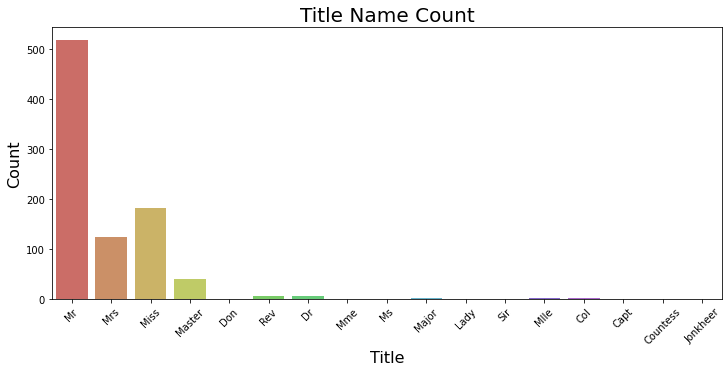

In [8]:
#GettingLooking the prefix of all Passengers
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

In [9]:
#Doing the same on df_test with regular expressions
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

## Grouping some titles and ploting the results

In [10]:
#Now, I will identify the social status of each title

Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
    
# we map each title to correct category
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

## Title grouped

Chances to survive based on titles: 
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.500000
Name: Survived, dtype: float64


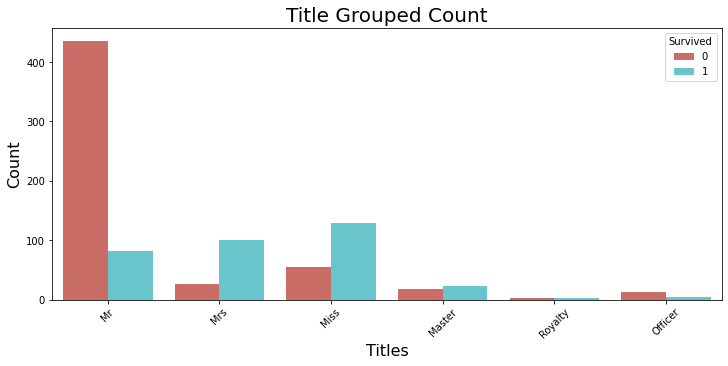

In [11]:
#printing the chance to survive by each title
print("Chances to survive based on titles: ") 
print(df_train.groupby("Title")["Survived"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='Title', data=df_train, palette="hls",
              hue="Survived")
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

It's interesting... Children's and ladys first, huh?

<h1> Now I will handle the Age variable that has a high number of NaN's, using some columns to correctly input he missing Age's

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


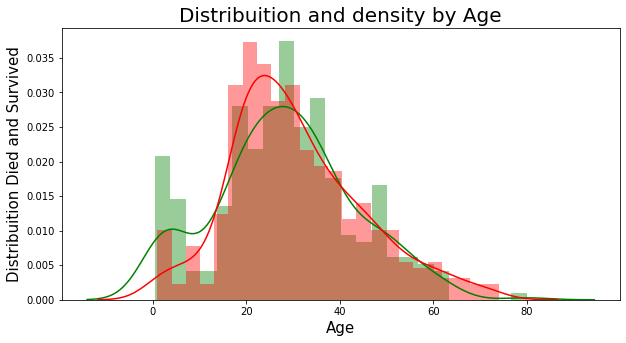

In [12]:
#First I will look my distribuition without NaN's
#I will create a df to look distribuition 
age_high_zero_died = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 0)]
age_high_zero_surv = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 1)]

#figure size
plt.figure(figsize=(10,5))

# Ploting the 2 variables that we create and compare the two
sns.distplot(age_high_zero_surv["Age"], bins=24, color='g')
sns.distplot(age_high_zero_died["Age"], bins=24, color='r')
plt.title("Distribuition and density by Age",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Distribuition Died and Survived",fontsize=15)
plt.show()

In [13]:
#Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's
age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]

#printing the variabe that we created by median
print(age_group.median())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


This might show us a better way to input the NAN's 

<b>For example: </b> an male in 2 class that is a Officer the median Age is 42. <br>
And we will use that to complete the missing data


In [14]:
#inputing the values on Age Na's 
# using the groupby to transform this variables
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')

# printing the total of nulls in Age Feature
print(df_train["Age"].isnull().sum())

0


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


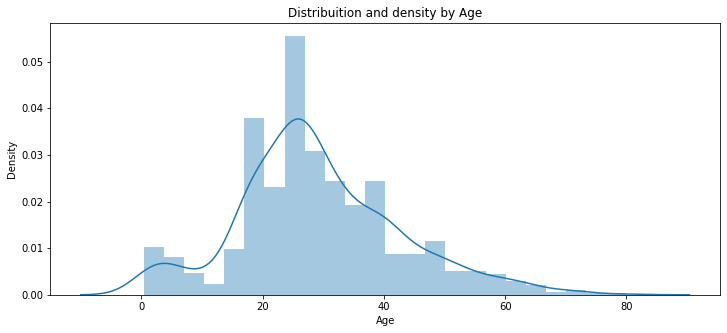

In [15]:
#Let's see the result of the inputation

#seting the figure size
plt.figure(figsize=(12,5))

#ploting again the Age Distribuition after the transformation in our dataset
sns.distplot(df_train["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

The `size` parameter has been renamed to `height`; please update your code.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<Figure size 864x360 with 0 Axes>

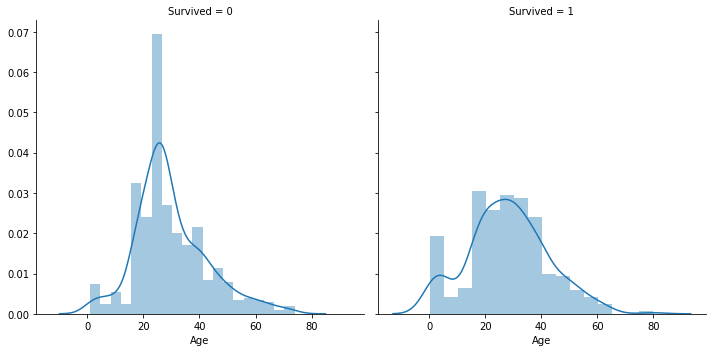

In [16]:
#separate by survivors or not

# figure size
plt.figure(figsize=(12,5))

# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(df_train, col='Survived',size=5)
g = g.map(sns.distplot, "Age")
plt.show()

Now let's categorize them 

In [17]:
#df_train.Age = df_train.Age.fillna(-0.5)

#creating the intervals that we need to cut each range of ages
interval = (0, 5, 12, 18, 25, 35, 60, 120) 

#Seting the names that we want use to the categorys
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# Applying the pd.cut and using the parameters that we created 
df_train["Age_cat"] = pd.cut(df_train.Age, interval, labels=cats)

# Printing the new Category
df_train["Age_cat"].head()

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_cat, dtype: category
Categories (7, object): ['babies' < 'Children' < 'Teen' < 'Student' < 'Young' < 'Adult' < 'Senior']

In [18]:
#Do the same to test dataset 
interval = (0, 5, 12, 18, 25, 35, 60, 120)

#same as the other df train
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# same that we used above in df train
df_test["Age_cat"] = pd.cut(df_test.Age, interval, labels=cats)

Survived    0   1
Age_cat          
babies     15  33
Children   16   9
Teen       54  49
Student   108  56
Young     206  99
Adult     133  91
Senior     17   5


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
48.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


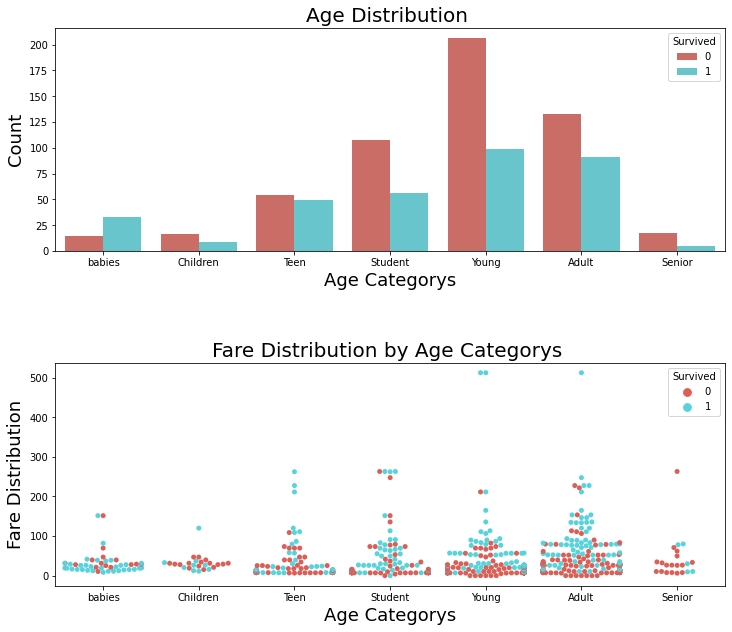

In [19]:
#Describe of categorical Age

# Using pd.crosstab to understand the Survived rate by Age Category's
print(pd.crosstab(df_train.Age_cat, df_train.Survived))

#Seting the figure size
plt.figure(figsize=(12,10))

#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Age_cat",data=df_train,hue="Survived", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Age Distribution ", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x='Age_cat',y="Fare",data=df_train,
              hue="Survived", palette="hls", )
plt.ylabel("Fare Distribution", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Fare Distribution by Age Categorys ", fontsize=20)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

Now it look's better and clearly

## Let's cross our Pclass with the Age_cat 
We will aggregate than to get the mean of Fare by each category pair


In [20]:
Age_fare = ['Pclass', 'Age_cat'] #seting the desired 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[Age_fare[0]], df_train[Age_fare[1]], 
            values=df_train['Fare'], aggfunc=['mean']).style.background_gradient(cmap = cm)


KeyError: '__dummy__'

- Very interesting. We can see that babies has the highest mean value. 

### Looking the Fare distribuition to survivors and not survivors


In [ ]:
# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition 
sns.distplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.distplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Fare Distribuition by Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

<br>
Description of Fare variable<br>
- Min: 0<br>
- Median: 14.45<br>
- Mean: 32.20<br>
- Max: 512.32<br> 
- Std: 49.69<br>

<h3>I will create a categorical variable to treat the Fare expend</h3><br>
I will use the same technique used in Age but now I will use the quantiles to binning



In [ ]:
#Filling the NA's with -0.5
df_train.Fare = df_train.Fare.fillna(-0.5)

#intervals to categorize
quant = (-1, 0, 8, 15, 31, 600)

#Labels without input values
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

#doing the cut in fare and puting in a new column
df_train["Fare_cat"] = pd.cut(df_train.Fare, quant, labels=label_quants)

#Description of transformation
print(pd.crosstab(df_train.Fare_cat, df_train.Survived))

plt.figure(figsize=(12,5))

#Plotting the new feature
sns.countplot(x="Fare_cat", hue="Survived", data=df_train, palette="hls")
plt.title("Count of survived x Fare expending",fontsize=20)
plt.xlabel("Fare Cat",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()

In [ ]:
# Replicate the same to df_test
df_test.Fare = df_test.Fare.fillna(-0.5)

quant = (-1, 0, 8, 15, 31, 1000)
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

df_test["Fare_cat"] = pd.cut(df_test.Fare, quant, labels=label_quants)

<h2>To complete this part, I will now work on "Names"

In [ ]:
#Now lets drop the variable Fare, Age and ticket that is irrelevant now
del df_train["Fare"]
del df_train["Ticket"]
del df_train["Age"]
del df_train["Cabin"]
del df_train["Name"]

#same in df_test
del df_test["Fare"]
del df_test["Ticket"]
del df_test["Age"]
del df_test["Cabin"]
del df_test["Name"]

In [ ]:
#Looking the result of transformations
df_train.head()

<h1>It's looking ok

Now, lets start explore the data

Total of Survived or not: 
Survived
0    549
1    342
Name: PassengerId, dtype: int64


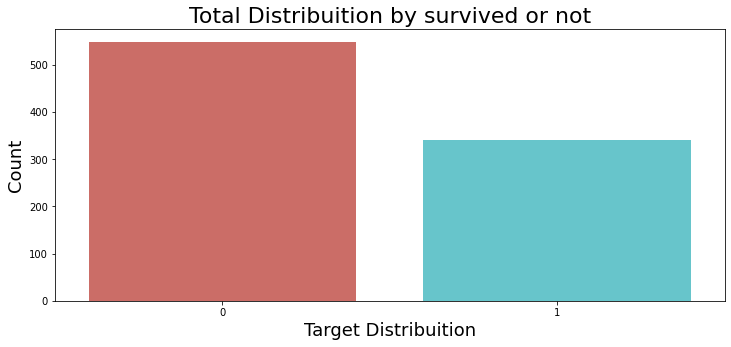

In [21]:
# Let see how many people die or survived
print("Total of Survived or not: ")
print(df_train.groupby("Survived")["PassengerId"].count())

plt.figure(figsize=(12,5))

sns.countplot(x="Survived", data=df_train,palette="hls")
plt.title('Total Distribuition by survived or not', fontsize=22)
plt.xlabel('Target Distribuition', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.show()

Sex       female  male
Survived              
0             81   468
1            233   109


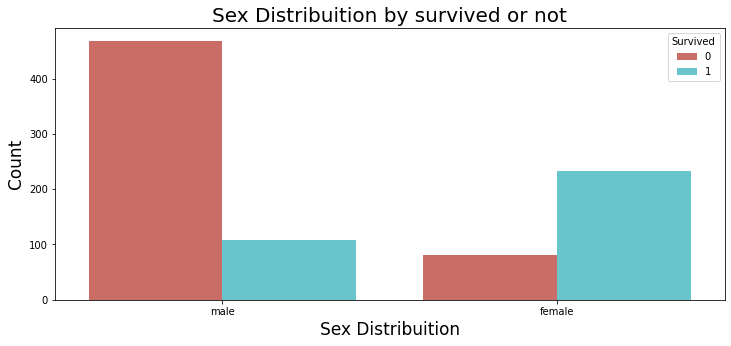

In [22]:
print(pd.crosstab(df_train.Survived, df_train.Sex))

plt.figure(figsize=(12,5))
sns.countplot(x="Sex", data=df_train, hue="Survived",palette="hls")
plt.title('Sex Distribuition by survived or not', fontsize=20)
plt.xlabel('Sex Distribuition',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

<h2>We can look that % dies to mens are much higher than female

<h1>Now, lets do some exploration in Pclass and Embarked to see if might have some information to build the model

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


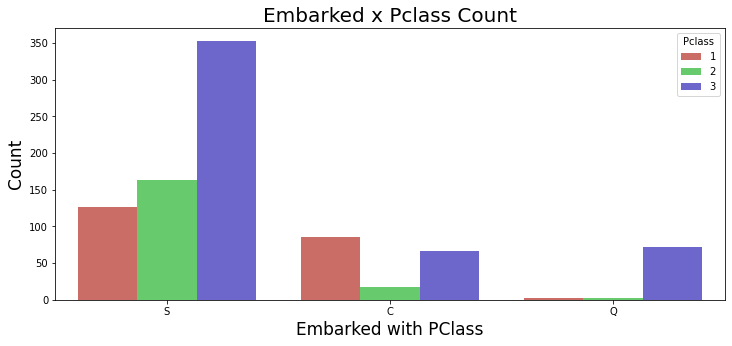

In [23]:
# Distribuition by class
print(pd.crosstab(df_train.Pclass, df_train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Pclass",palette="hls")
plt.title('Embarked x Pclass Count', fontsize=20)
plt.xlabel('Embarked with PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

In [24]:
#lets input the NA's with the highest frequency
df_train["Embarked"] = df_train["Embarked"].fillna('S')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


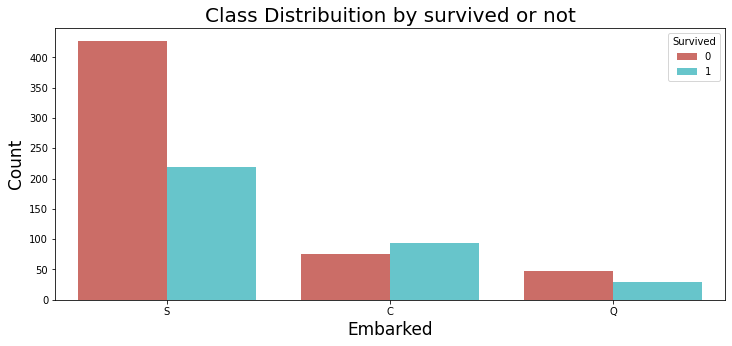

In [25]:
# Exploring Survivors vs Embarked
print(pd.crosstab(df_train.Survived, df_train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Survived",palette="hls")
plt.title('Class Distribuition by survived or not',fontsize=20)
plt.xlabel('Embarked',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


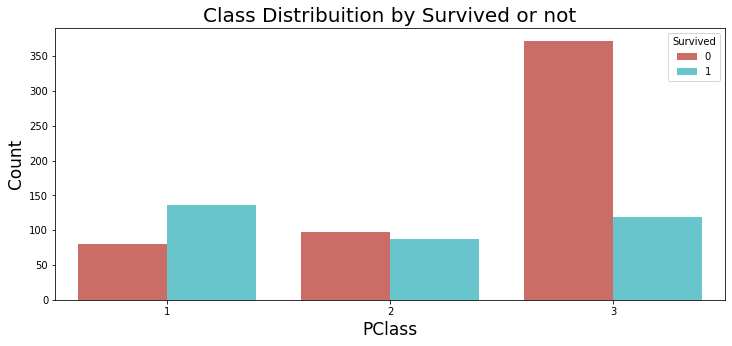

In [26]:
# Exploring Survivors vs Pclass
print(pd.crosstab(df_train.Survived, df_train.Pclass))

plt.figure(figsize=(12,5))

sns.countplot(x="Pclass", data=df_train, hue="Survived",palette="hls")
plt.xlabel('PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.title('Class Distribuition by Survived or not', fontsize=20)

plt.show()

<b>Looking the graphs, is clear that 3st class and Embarked at Southampton have a high probabilities to not survive</b>

To finish the analysis I let's look the Sibsp and Parch variables

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


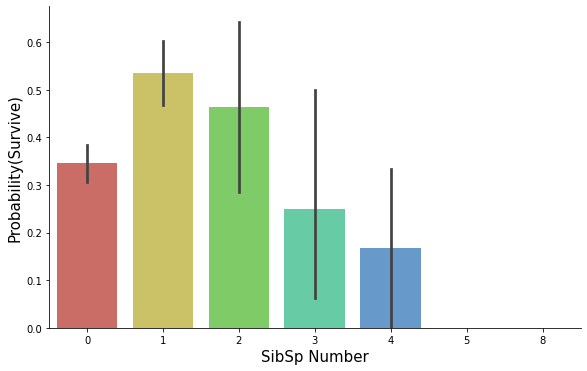

In [27]:
g = sns.factorplot(x="SibSp",y="Survived",data=df_train,
                   kind="bar", height = 5, aspect= 1.6, palette = "hls")
g.set_ylabels("Probability(Survive)", fontsize=15)
g.set_xlabels("SibSp Number", fontsize=15)

plt.show()


In [28]:
f

NameError: name 'f' is not defined

Interesting. With 1 or 2 siblings/spouses have more chance to survived the disaster

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
The `size` parameter has been renamed to `height`; please update your code.


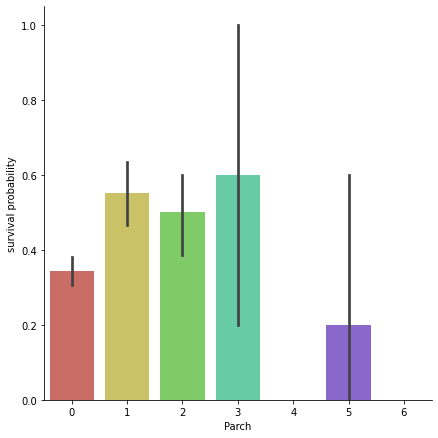

In [29]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="Parch",y="Survived",data=df_train, kind="bar", size = 6,palette = "hls")
g = g.set_ylabels("survival probability")

We can see a high standard deviation in the survival with 3 parents/children person's <br>
Also that small families (1~2) have more chance to survival than single or big families

So to Finish our exploration I will create a new column to with familiees size

In [30]:
#Create a new column and sum the Parch + SibSp + 1 that refers the people self
df_train["FSize"] = df_train["Parch"] + df_train["SibSp"] + 1

df_test["FSize"] = df_test["Parch"] + df_test["SibSp"] + 1

Survived    0    1
FSize             
1         374  163
2          72   89
3          43   59
4           8   21
5          12    3
6          19    3
7           8    4
8           6    0
11          7    0


The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
The `size` parameter has been renamed to `height`; please update your code.


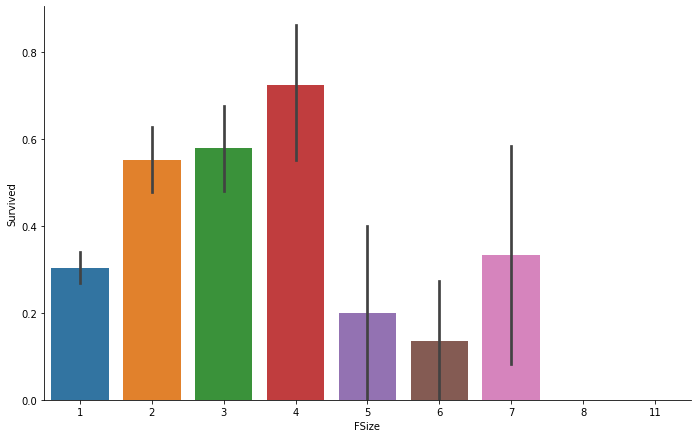

In [31]:
print(pd.crosstab(df_train.FSize, df_train.Survived))
sns.factorplot(x="FSize",y="Survived", data=df_train, kind="bar",size=6, aspect=1.6)
plt.show()

In [32]:
del df_train["SibSp"]
del df_train["Parch"]

del df_test["SibSp"]
del df_test["Parch"]

OK, its might be enough to start with the preprocess and builting the model


<a id="Preprocess"></a> <br> 
# **5. Preprocessing :** 

In [45]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Age_cat,FSize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,Mr,Student,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,Mrs,Adult,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,Mrs,Young,2
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,Mr,Young,1


Now we might have information enough to think about the model structure

In [50]:
df_train = pd.get_dummies(df_train, columns=["Sex","Embarked","Age_cat","Title"],\
                          prefix=["Sex","Emb","Age","Prefix"], drop_first=True)

df_test = pd.get_dummies(df_test, columns=["Sex","Embarked","Age_cat","Title"],\
                         prefix=["Sex","Emb","Age","Prefix"], drop_first=True)

ValueError: could not convert string to float: 'Student'

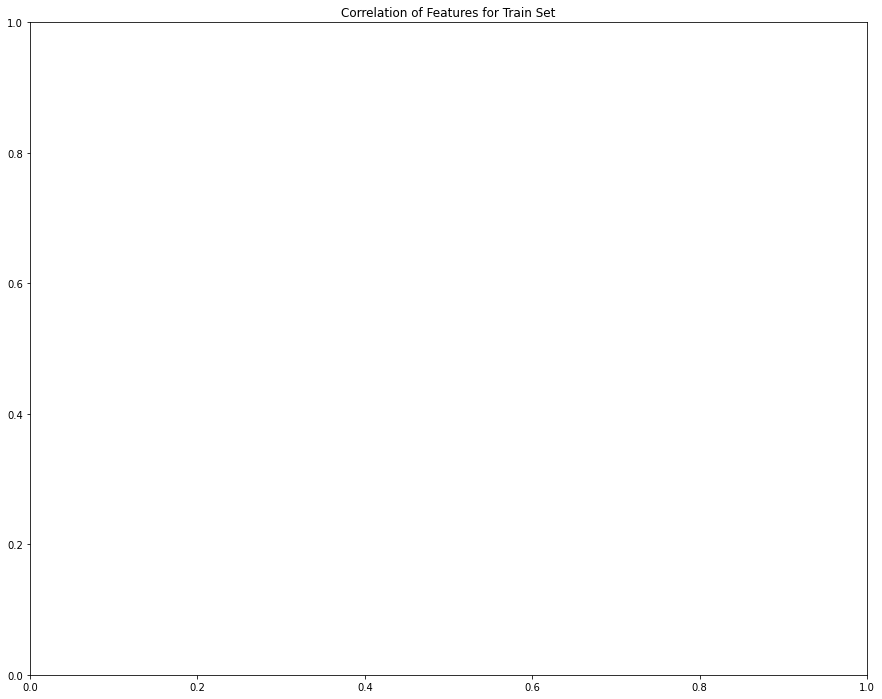

In [35]:
#Finallt, lets look the correlation of df_train
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [51]:
df_train.shape

(891, 22)

In [53]:
#df_train = df_train.drop(["PassengerId"],axis=1)

train = df_train.drop(["Survived","PassengerId"],axis=1)
train_ = df_train["Survived"]

test_ = df_test.drop(["PassengerId"],axis=1)

X_train = train.values
y_train = train_.values

X_test = test_.values
X_test = X_test.astype(np.float64, copy=False)

KeyError: "['PassengerId'] not found in axis"

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

NameError: name 'X_train' is not defined

<a id="Model"></a> <br> 
# **6. Modelling : ** 

<h3>Titanic survivors prediction: <br>
a binary classification example</h3>
Two-class classification, or binary classification, may be the most widely applied kind of machine-learning problem.

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
import graphviz

Using TensorFlow backend.


<h1>Anatomy of a neural network: </h1>

As you saw in the previous chapters, training a neural network revolves around the following
objects:
- Layers, which are combined into a network (or model)
- The input data and corresponding targets
- The loss function, which defines the feedback signal used for learning
- The optimizer, which determines how learning proceeds




<h2> Layers: the building blocks of deep learning</h2>
from keras import layers<br>
layer = layers.Dense(32, input_dim=data_dimension)) 

- We can think of layers as the LEGO bricks of deep learning, a metaphor that is
made explicit by frameworks like Keras. Building deep-learning models in Keras is
done by clipping together compatible layers to form useful data-transformation pipelines.


<h2>What are activation functions, and why are they necessary?</h2>
Without an activation function like relu (also called a non-linearity), the Dense layer would consist of two linear operations—a dot product and an addition: <br><br>
<i>output = dot(W, input) + b</i><br><br>

So the layer could only learn linear transformations (affine transformations) of the
input data: the hypothesis space of the layer would be the set of all possible linear
transformations of the input data into a 16-dimensional space. 


<h2>Loss functions and optimizers:<br>
keys to configuring the learning process</h2>
Once the network architecture is defined, you still have to choose two more things:
- <b>Loss function (objective function) </b>- The quantity that will be minimized during
training. It represents a measure of success for the task at hand.
- <b>Optimizer</b> - Determines how the network will be updated based on the loss function.
It implements a specific variant of stochastic gradient descent (SGD).

In [44]:
# Creating the model
model = Sequential()

# Inputing the first layer with input dimensions
model.add(Dense(18, 
                activation='relu',  
                input_dim=20,
                kernel_initializer='uniform'))
#The argument being passed to each Dense layer (18) is the number of hidden units of the layer. 
# A hidden unit is a dimension in the representation space of the layer.

#Stacks of Dense layers with relu activations can solve a wide range of problems
#(including sentiment classification), and you’ll likely use them frequently.

# Adding an Dropout layer to previne from overfitting
model.add(Dropout(0.50))

#adding second hidden layer 
model.add(Dense(60,
                kernel_initializer='uniform',
                activation='relu'))

# Adding another Dropout layer
model.add(Dropout(0.50))

# adding the output layer that is binary [0,1]
model.add(Dense(1,
                kernel_initializer='uniform',
                activation='sigmoid'))
#With such a scalar sigmoid output on a binary classification problem, the loss
#function you should use is binary_crossentropy

#Visualizing the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                378       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                1140      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 1,579
Trainable params: 1,579
Non-trainable params: 0
_________________________________________________________________


Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.

Finally, we need to choose a loss function and an optimizer. 

In [45]:
#Creating an Stochastic Gradient Descent
sgd = SGD(lr = 0.01, momentum = 0.9)

# Compiling our model
model.compile(optimizer = sgd, 
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])
#optimizers list
#optimizers['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

# Fitting the ANN to the Training set
model.fit(X_train, y_train, 
               batch_size = 60, 
               epochs = 30, verbose=2)

Epoch 1/30
 - 4s - loss: 0.6899 - acc: 0.6150
Epoch 2/30
 - 0s - loss: 0.6789 - acc: 0.6162
Epoch 3/30
 - 0s - loss: 0.6711 - acc: 0.6162
Epoch 4/30
 - 0s - loss: 0.6675 - acc: 0.6162
Epoch 5/30
 - 0s - loss: 0.6660 - acc: 0.6162
Epoch 6/30
 - 0s - loss: 0.6655 - acc: 0.6162
Epoch 7/30
 - 0s - loss: 0.6652 - acc: 0.6162
Epoch 8/30
 - 0s - loss: 0.6650 - acc: 0.6162
Epoch 9/30
 - 0s - loss: 0.6646 - acc: 0.6162
Epoch 10/30
 - 0s - loss: 0.6642 - acc: 0.6162
Epoch 11/30
 - 0s - loss: 0.6640 - acc: 0.6162
Epoch 12/30
 - 0s - loss: 0.6633 - acc: 0.6162
Epoch 13/30
 - 0s - loss: 0.6621 - acc: 0.6162
Epoch 14/30
 - 0s - loss: 0.6613 - acc: 0.6162
Epoch 15/30
 - 0s - loss: 0.6594 - acc: 0.6162
Epoch 16/30
 - 0s - loss: 0.6577 - acc: 0.6162
Epoch 17/30
 - 0s - loss: 0.6549 - acc: 0.6162
Epoch 18/30
 - 0s - loss: 0.6494 - acc: 0.6162
Epoch 19/30
 - 0s - loss: 0.6440 - acc: 0.6162
Epoch 20/30
 - 0s - loss: 0.6330 - acc: 0.6184
Epoch 21/30
 - 0s - loss: 0.6154 - acc: 0.6532
Epoch 22/30
 - 0s - lo

Because you’re facing a binary classification problem and the output of your network is a probability (you end your network with a single-unit layer with a sigmoid activation), it’s best to use the <i>binary_crossentropy</i> loss.

## Predicting X_test

In [46]:
y_preds = model.predict(X_test)

submission = pd.read_csv("../input/gender_submission.csv", index_col='PassengerId')
submission['Survived'] = y_preds.astype(int)
submission.to_csv('TitanicKNN.csv')

<h1>Evaluating the model</h1>

In [47]:
scores = model.evaluate(X_train, y_train, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

891/891 [==============================] - 0s 114us/step
acc: 81.14%


Not bad result to a simple model! Let's now verify the validation of our model, to see and understand the learning curve

<a id="Validation"></a> <br> 
# **7. Validation: ** 

In [48]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.20, 
                    epochs=180, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Let's look this keys values further

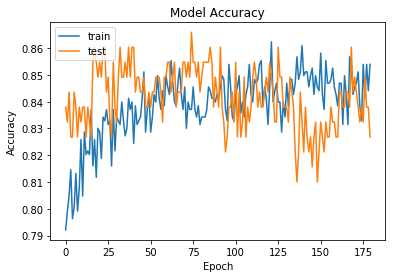

In [49]:
# summarizing historical accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Why this occurs and how to solve this problem in graph? it's a overffiting? 

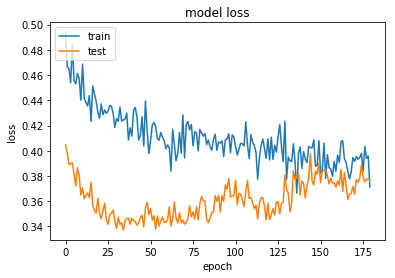

In [50]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
y_pred = model.predict(X_test)

<h1>It's my first Deep Learning implementation... I am studying about this and I will continue editing this Kernel to improve the results</h1>

Give me your feedback how can I increase this model =) 

In [52]:
# Trying to implementing the TensorBoard to evaluate the model

callbacks = [
    keras.callbacks.TensorBoard(log_dir='my_log_dir',
                                histogram_freq=1,
                                embeddings_freq=1,
                               )
]

In [70]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


LogReg: 0.829402 (+/- 0.016157)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


XGBClassifier: 0.805819 (+/- 0.018489)
KNN: 0.782261 (+/- 0.021196)
DecisionTreeClassifier: 0.801337 (+/- 0.018422)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


RandomForestClassifier: 0.813678 (+/- 0.015808)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


GradientBoostingClassifier: 0.812573 (+/- 0.018291)
RidgeClassifier: 0.818191 (+/- 0.025943)
BaggingRidgeClassifier: 0.815950 (+/- 0.025371)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


ExtraTreesClassifier: 0.803597 (+/- 0.014570)


TypeError: Neither the `x` nor `y` variable appears to be numeric.

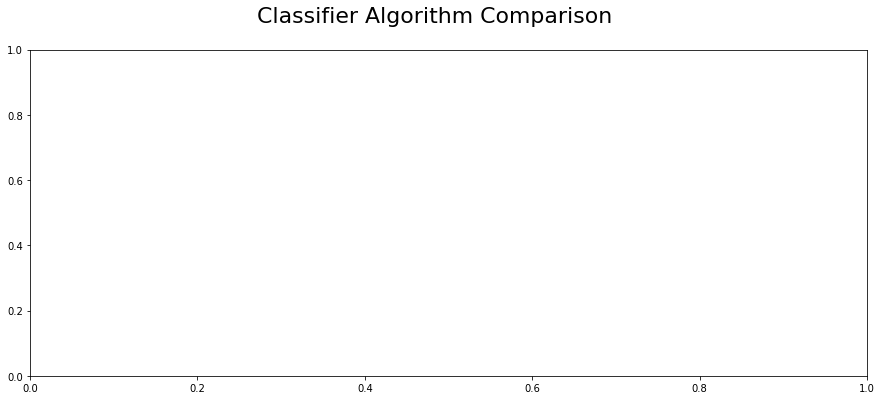

In [83]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# Stay tuned and don't forget to votesup this kernel

## Fairness

In [39]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [40]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [41]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [63]:
df_train = df_train.drop(["Cabin"], axis = 1)
df_train

,Survived,Pclass,Age,Fare,FSize,Sex_male,Emb_Q,Emb_S,Age_Children,Age_Teen,Age_Student,Age_Young,Age_Adult,Age_Senior,Prefix_Miss,Prefix_Mr,Prefix_Mrs,Prefix_Officer,Prefix_Royalty
0,0,3,22.0,7.2500,2,1,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,1,38.0,71.2833,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,1,1,35.0,53.1000,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,3,35.0,8.0500,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0
887,1,1,19.0,30.0000,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
888,0,3,18.0,23.4500,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0
889,1,1,26.0,30.0000,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [64]:
privileged_groups = [{'Sex_male': 0}]
unprivileged_groups = [{'Sex_male': 1}]
dataset_orig = StandardDataset(df_train,
                                  label_name='Survived',
                                  protected_attribute_names=['Sex_male'],
                                  favorable_classes=[1],
                                  privileged_classes=[[0]])


In [65]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.553130


In [7]:
data_orig_train = pd.read_pickle('../../Results/VotingClassifier/5-titanic-eda-model-pipeline-keras-nn_Train.pkl')
data_orig_test = pd.read_pickle('../../Results/VotingClassifier/5-titanic-eda-model-pipeline-keras-nn_Test.pkl')

In [68]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import pickle

#data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()

estimators = [("LogReg", LogisticRegression(random_state=1)), ("XGB", XGBClassifier(random_state=1)), ("KNN", KNeighborsClassifier()),
              ("DecisionTrees", DecisionTreeClassifier(random_state=1)), ("RandomForest", RandomForestClassifier(random_state=1)),
              ("GradientBoosting", GradientBoostingClassifier(random_state=1)),
              ("BaggingClassifier", BaggingClassifier(random_state=1)),
              ("ExtraTrees", ExtraTreesClassifier(random_state=1))]



votingC = VotingClassifier(estimators =[("LogReg", LogisticRegression()), ("XGB", XGBClassifier()), ("KNN", KNeighborsClassifier()),
              ("DecisionTrees", DecisionTreeClassifier()), ("RandomForest", RandomForestClassifier()),
              ("GradientBoosting", GradientBoostingClassifier(random_state=1)),
              ("BaggingClassifier", BaggingClassifier()),
              ("ExtraTrees", ExtraTreesClassifier())], voting='soft')

model = votingC.fit(X_train, y_train)


mdl = model.fit(X_train, y_train)
#with open('../../Results/VotingClassifier/' + nb_fname + '.pkl', 'wb') as f:
#    pickle.dump(mdl, f)

#with open('../../Results/VotingClassifier/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
#    pickle.dump(data_orig_train, f) 
    
#with open('../../Results/VotingClassifier/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
#    pickle.dump(data_orig_test, f) 

NameError: name 'KNeighborsClassifier' is not defined

In [71]:
final_metrics = []
accuracy = []
f1= []
from statistics import mean
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import VotingClassifier

for i in range(0,20):
    
    data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
    print(i)
    X_train = data_orig_train.features
    y_train = data_orig_train.labels.ravel()

    X_test = data_orig_test.features
    y_test = data_orig_test.labels.ravel()
    votingC = VotingClassifier(estimators =[("LogReg", LogisticRegression()), ("XGB", XGBClassifier()), ("KNN", KNeighborsClassifier()),
              ("DecisionTrees", DecisionTreeClassifier()), ("RandomForest", RandomForestClassifier()),
              ("GradientBoosting", GradientBoostingClassifier(random_state=1)),
              ("BaggingClassifier", BaggingClassifier()),
              ("ExtraTrees", ExtraTreesClassifier())], voting='soft')

    model = votingC.fit(X_train, y_train)
  
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)

element_wise_std =  np.std(final_metrics, 0, ddof=1)
print("STD " + str(element_wise_std))
final_metrics = list(map(mean, zip(*final_metrics)))
accuracy = mean(accuracy)
f1 = mean(f1)
final_metrics[4] = np.log(final_metrics[4])
print(final_metrics)
print(sum(final_metrics[1:]))
print(accuracy)
print(f1)

0


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


1


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


3


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


4


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


5


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


6


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


7


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


8


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


9


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


10


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


11


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


12


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


13


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


14


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


15


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


16


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


17


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


18


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


19


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


STD [5.91607978 0.06655028 0.09193747 0.09481242 0.04721589 0.01856381]
[9.5, -0.6493277705646018, -0.49678503085737225, 0.4296497563610884, -1.7310379440646233, 0.1345518598659361]
-2.3129491292595734
0.8208955223880597
0.7630292474228744


In [19]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
list_estimators = []
f1= []

for name, ml_model in estimators:
    
    list_estimators.append((name,ml_model))
    #print(list_estimators)
    model = VotingClassifier(estimators=list_estimators, voting='hard')
    #list_estimators = []
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)        
    fair_list = fair.iloc[1].tolist()
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [20]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
final_result[3] = np.log(final_result[3])
final_result = final_result.transpose()
acc_f1 = pd.DataFrame(accuracy)
acc_f1['f1'] = f1
acc_f1 = pd.DataFrame(acc_f1).transpose()
acc = acc_f1.rename(index={0: 'accuracy', 1: 'f1'})
final_result = final_result.rename(index={0: 'statistical_parity_difference', 1: 'equal_opportunity_difference', 2: 'average_abs_odds_difference', 3: 'disparate_impact', 4: 'theil_index'})
final_result = pd.concat([acc,final_result])
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(len(list_estimators) - 1)])   ##Add final metrics add the beginning of the df
#final_result.to_csv('../../Results/VotingClassifier/' + nb_fname + '.csv')
final_result

,classifier,T0,T1,T2,T3,T4,T5,T6,T7
accuracy,0.813433,0.828358,0.798507,0.820896,0.809701,0.813433,0.813433,0.809701,0.813433
f1,0.731183,0.755319,0.689655,0.752577,0.724324,0.739583,0.725275,0.730159,0.731183
statistical_parity_difference,-0.568172,-0.721413,-0.620276,-0.637727,-0.606820,-0.583287,-0.591029,-0.551029,-0.568172
equal_opportunity_difference,-0.436594,-0.800272,-0.686594,-0.554801,-0.513587,-0.434330,-0.499094,-0.405344,-0.436594
average_abs_odds_difference,0.353495,0.538831,0.468151,0.426439,0.416321,0.366203,0.391738,0.330877,0.353495
disparate_impact,-1.746547,-2.371302,-2.472736,-1.803824,-1.931469,-1.658825,-1.957856,-1.613016,-1.746547
theil_index,0.155078,0.140978,0.185439,0.136943,0.159426,0.145492,0.161407,0.153016,0.155078
